# Pytorch VAEs


https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)
        self.fc22 = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Define loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Define training function
def train(model, optimizer, train_loader, epochs):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(data)))

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.,), (1.,))
])
train_loader = DataLoader(datasets.MNIST('../../data', train=True, download=True, transform=transform), batch_size=128, shuffle=True)

# Instantiate VAE model
input_dim = 784
hidden_dim = 400
latent_dim = 20
model = VAE(input_dim, hidden_dim, latent_dim).to(device)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train model
train(model, optimizer, train_loader, epochs=10)


Train Epoch: 0 [0/60000 (0%)]	Loss: 550.313293
Train Epoch: 0 [12800/60000 (21%)]	Loss: 178.927124
Train Epoch: 0 [25600/60000 (43%)]	Loss: 154.517349
Train Epoch: 0 [38400/60000 (64%)]	Loss: 139.809937
Train Epoch: 0 [51200/60000 (85%)]	Loss: 135.105957
Train Epoch: 1 [0/60000 (0%)]	Loss: 127.753456
Train Epoch: 1 [12800/60000 (21%)]	Loss: 122.305275
Train Epoch: 1 [25600/60000 (43%)]	Loss: 120.329872
Train Epoch: 1 [38400/60000 (64%)]	Loss: 119.748810
Train Epoch: 1 [51200/60000 (85%)]	Loss: 119.552307
Train Epoch: 2 [0/60000 (0%)]	Loss: 112.272476
Train Epoch: 2 [12800/60000 (21%)]	Loss: 118.831886
Train Epoch: 2 [25600/60000 (43%)]	Loss: 113.279121
Train Epoch: 2 [38400/60000 (64%)]	Loss: 115.357414
Train Epoch: 2 [51200/60000 (85%)]	Loss: 114.264641
Train Epoch: 3 [0/60000 (0%)]	Loss: 116.754669
Train Epoch: 3 [12800/60000 (21%)]	Loss: 109.270523
Train Epoch: 3 [25600/60000 (43%)]	Loss: 108.823715
Train Epoch: 3 [38400/60000 (64%)]	Loss: 108.806641
Train Epoch: 3 [51200/60000 (85%

In [3]:
### 

### Computing Graph

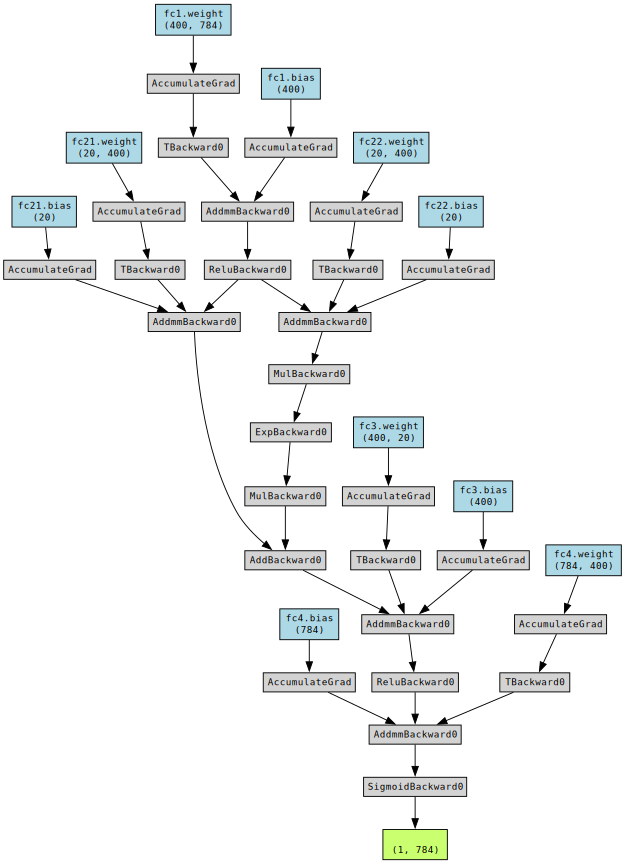

In [10]:
import torchviz 
import torch.nn.functional as F 

sample_input = torch.randn(1, 784)
model = VAE(input_dim, hidden_dim, latent_dim).to(device)
recon_batch, mu, logvar = model(sample_input)

torchviz.make_dot(recon_batch, params=dict(model.named_parameters()))

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [6]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## Create Models

In [7]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298757  [    0/60000]
loss: 2.289601  [ 6400/60000]
loss: 2.276316  [12800/60000]
loss: 2.274573  [19200/60000]
loss: 2.268358  [25600/60000]
loss: 2.224753  [32000/60000]
loss: 2.239569  [38400/60000]
loss: 2.201534  [44800/60000]
loss: 2.191858  [51200/60000]
loss: 2.171807  [57600/60000]
Test Error: 
 Accuracy: 42.4%, Avg loss: 2.163882 

Epoch 2
-------------------------------
loss: 2.170543  [    0/60000]
loss: 2.158558  [ 6400/60000]
loss: 2.108370  [12800/60000]
loss: 2.123218  [19200/60000]
loss: 2.078524  [25600/60000]
loss: 2.014241  [32000/60000]
loss: 2.044525  [38400/60000]
loss: 1.965140  [44800/60000]
loss: 1.961649  [51200/60000]
loss: 1.898824  [57600/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.893673 

Epoch 3
-------------------------------
loss: 1.924486  [    0/60000]
loss: 1.888659  [ 6400/60000]
loss: 1.776397  [12800/60000]
loss: 1.817757  [19200/60000]
loss: 1.711230  [25600/60000]
loss: 1.658160  [32000/600

### Model Save & Load

In [12]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [13]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [14]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    print(f'pred: "{pred}"')
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

pred: "tensor([[-0.9666, -1.2041, -0.1476, -1.0406, -0.2823,  0.6578, -0.5154,  1.1432,
          0.9284,  1.4916]])"
Predicted: "Ankle boot", Actual: "Ankle boot"
